# Architectural Diagram of the K8-VMWare Visualisations

In [1]:
%%capture
import sys
!{sys.executable} -m pip install iplantuml

In [2]:
import iplantuml
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:70% !important; }</style>"))

In [3]:
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

## Simple "handwritten" workflow

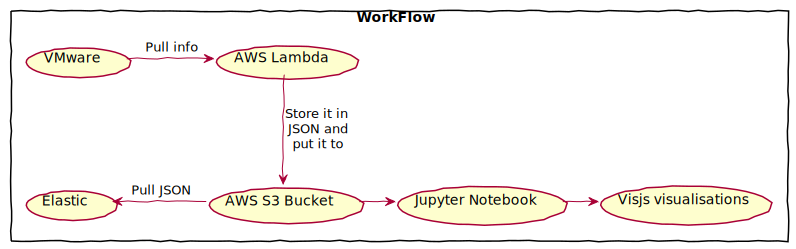

In [4]:
%%plantuml

@startuml

skinparam handwritten true

rectangle WorkFlow {
  usecase "VMware" 
  usecase "AWS Lambda" as AWS_Lambda
  usecase "AWS S3 Bucket" as AWS_S3_Bucket
  usecase "Elastic"
  usecase "Jupyter Notebook" as Jupyter_Notebook
  usecase "Visjs visualisations" as Visjs
}

VMware  -right->  AWS_Lambda :"Pull info"
AWS_Lambda  -down->  AWS_S3_Bucket :"Store it in\n JSON and\n put it to"
AWS_S3_Bucket  -left->  Elastic :"Pull JSON"
AWS_S3_Bucket  -right->  Jupyter_Notebook
Jupyter_Notebook  -right->  Visjs

@enduml 

## Using icons

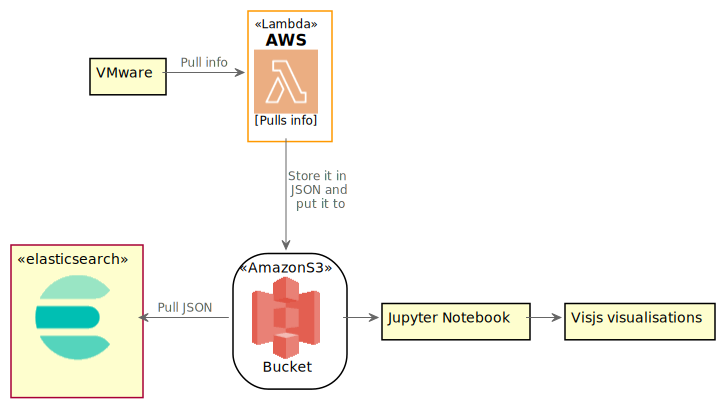

In [5]:
%%plantuml

@startuml

!include <awslib/AWSCommon>
' Uncomment the following line to create simplified view
'!include <awslib/AWSSimplified>

!include <awslib/Compute/Lambda>

!include <aws/common>
!include <aws/Storage/AmazonS3/AmazonS3>
!include <aws/Storage/AmazonS3/bucket/bucket>

!include <elastic/common>
!include <elastic/elasticsearch/elasticsearch>

Lambda(AWS_Lambda, "AWS", "Pulls info")
AMAZONS3(AWS_S3_Bucket, "Bucket")
ELASTICSEARCH(Elastic, "", agent) 

rectangle VMware
rectangle "Jupyter Notebook" as Jupyter_Notebook
rectangle "Visjs visualisations" as Visjs

VMware  -right->  AWS_Lambda :"Pull info"
AWS_Lambda  -down->  AWS_S3_Bucket :"Store it in\n JSON and\n put it to"
AWS_S3_Bucket  -left->  Elastic :"Pull JSON"
AWS_S3_Bucket  -right->  Jupyter_Notebook
Jupyter_Notebook  -right->  Visjs

@enduml